In [1]:
!nvidia-smi

Sun Jul 10 04:31:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [3]:
!pip install tensorflow-gpu==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install Keras==2.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%cd keras-retinanet/


!pip install .

[Errno 2] No such file or directory: 'keras-retinanet/'
/content/keras-retinanet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=170121 sha256=09408750ca05a5d1b6196fc42d77ce7b07cf9256aa05f900102418c9e22a3f4c
  Stored in directory: /root/.cache/pip/wheels/32/29/34/9b33c07f08b1be9e77607c1fc6b08c679489aa7ddaed329652
Successfully built keras-retinanet
  Attempting uninstall: keras-retinanet
    Found existing install

In [8]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [9]:
import tensorflow as tf
tf.__version__


'2.3.0'

In [10]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv


import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [12]:
os.makedirs("snapshots", exist_ok=True)

In [13]:
!gdown --id 1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R --output snapshots/resnet50_csv_10.h5

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R
To: /content/keras-retinanet/snapshots/resnet50_csv_10.h5
100% 249M/249M [00:01<00:00, 206MB/s]


In [14]:
!unzip /content/vott-csv-export.zip -d .

Archive:  /content/vott-csv-export.zip
replace ./vott-csv-export/IMG_20160315_071740.jpg.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./vott-csv-export/Skoda-Octavia-5.jpg.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [15]:
#Unzip Dataset

!unzip /content/vott-csv-export.zip -d .

Archive:  /content/vott-csv-export.zip
replace ./vott-csv-export/IMG_20160315_071740.jpg.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [16]:
! ls vott-csv-export/

1031520d1356604430-skoda-rapid-joins-family-edit-sold-wp_000281.jpg.jpeg
1107433d1373284570-my-modded-skoda-rapid-now-166-bhp-351-nm-119-whp-per-tonne-hdr_00005_normal.jpg.jpeg
1431956d1446017445-number-plates-merchandise-canvas-ink-gurgaon-edit-closed-thumb_img_4418_1024.jpg.jpeg
1572920d1478091901-your-favourite-number-plate-font-jetta-german-font.jpg.jpeg
1658240d1500548920-close-look-2017-skoda-octavia-facelift-hands-free-parking-front-bumper.jpg.jpeg
1.jpg
2014-Volkswagen-Polo-Review.jpg.jpeg
2014-VW-Polo-facelift-spied-India-rear.jpg.jpeg
2017-Skoda-Rapid-Diesel-DSG-Review-6.jpg.jpeg
205356-maruti-swift-torque-blue-vdi-ddis-glistening-rockstar-enters-home-img_7531.jpg.jpeg
216279d1481352986-silver-venom-mahindra-scorpio-s4-2016-ownership-review-wp_20161122_11_19_00_pro.jpg.jpeg
224489195_8_1000x700_skoda-superb-2010-.jpg.jpeg
2.jpg
77cca4b6f3864b3928824a030ba101d2.jpg.jpeg
9214a754343030395508e104d7948167_large.jpg.jpeg
995920d1349421647-cappuccino-beige-czech-tank-here-my-skoda-

In [17]:

plates_df = pd.read_csv('vott-csv-export/ANPRProject-export.csv')

In [18]:
os.makedirs("vott-csv-export", exist_ok=True)

In [19]:
plates_df

,image,xmin,ymin,xmax,ymax,label
0,1572920d1478091901-your-favourite-number-plate...,156.472118,99.397996,369.071050,143.336936,numberplate
1,1107433d1373284570-my-modded-skoda-rapid-now-1...,62.305658,230.236759,240.774657,273.722853,numberplate
2,1431956d1446017445-number-plates-merchandise-c...,137.633267,135.082814,388.521605,190.525677,numberplate
3,1.jpg,140.084398,74.945189,434.328424,151.207161,numberplate
4,1031520d1356604430-skoda-rapid-joins-family-ed...,159.741229,209.580929,363.770250,251.189300,numberplate
5,2014-VW-Polo-facelift-spied-India-rear.jpg.jpeg,189.781088,318.960976,378.979240,359.506405,numberplate
6,1658240d1500548920-close-look-2017-skoda-octav...,163.637591,131.442307,331.037024,170.249216,numberplate
7,2.jpg,146.374945,102.153819,366.912698,213.097545,numberplate
8,2014-Volkswagen-Polo-Review.jpg.jpeg,158.796622,259.520091,328.203024,296.997211,numberplate
9,2017-Skoda-Rapid-Diesel-DSG-Review-6.jpg.jpeg,243.805741,113.910285,373.423693,146.558857,numberplate


In [20]:
plates_df['newImage'] = 'vott-csv-export/'+plates_df.image
plates_df['xmin']=plates_df['xmin'].apply(round)
plates_df['ymin']=plates_df['ymin'].apply(round)
plates_df['xmax']=plates_df['xmax'].apply(round)
plates_df['ymax']=plates_df['ymax'].apply(round)
plates_df.head()

,image,xmin,ymin,xmax,ymax,label,newImage
0,1572920d1478091901-your-favourite-number-plate...,156,99,369,143,numberplate,vott-csv-export/1572920d1478091901-your-favour...
1,1107433d1373284570-my-modded-skoda-rapid-now-1...,62,230,241,274,numberplate,vott-csv-export/1107433d1373284570-my-modded-s...
2,1431956d1446017445-number-plates-merchandise-c...,138,135,389,191,numberplate,vott-csv-export/1431956d1446017445-number-plat...
3,1.jpg,140,75,434,151,numberplate,vott-csv-export/1.jpg
4,1031520d1356604430-skoda-rapid-joins-family-ed...,160,210,364,251,numberplate,vott-csv-export/1031520d1356604430-skoda-rapid...


In [21]:
df = plates_df.drop('image',axis=1)
df = df.iloc[:,[5,0,1,2,3,4]]
df.head()

,newImage,xmin,ymin,xmax,ymax,label
0,vott-csv-export/1572920d1478091901-your-favour...,156,99,369,143,numberplate
1,vott-csv-export/1107433d1373284570-my-modded-s...,62,230,241,274,numberplate
2,vott-csv-export/1431956d1446017445-number-plat...,138,135,389,191,numberplate
3,vott-csv-export/1.jpg,140,75,434,151,numberplate
4,vott-csv-export/1031520d1356604430-skoda-rapid...,160,210,364,251,numberplate


In [22]:

def show_image_objects(image_row):

  img_path = image_row.newImage
  box = [
    image_row.xmin, image_row.ymin, image_row.xmax, image_row.ymax
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [23]:
! pwd

/content/keras-retinanet


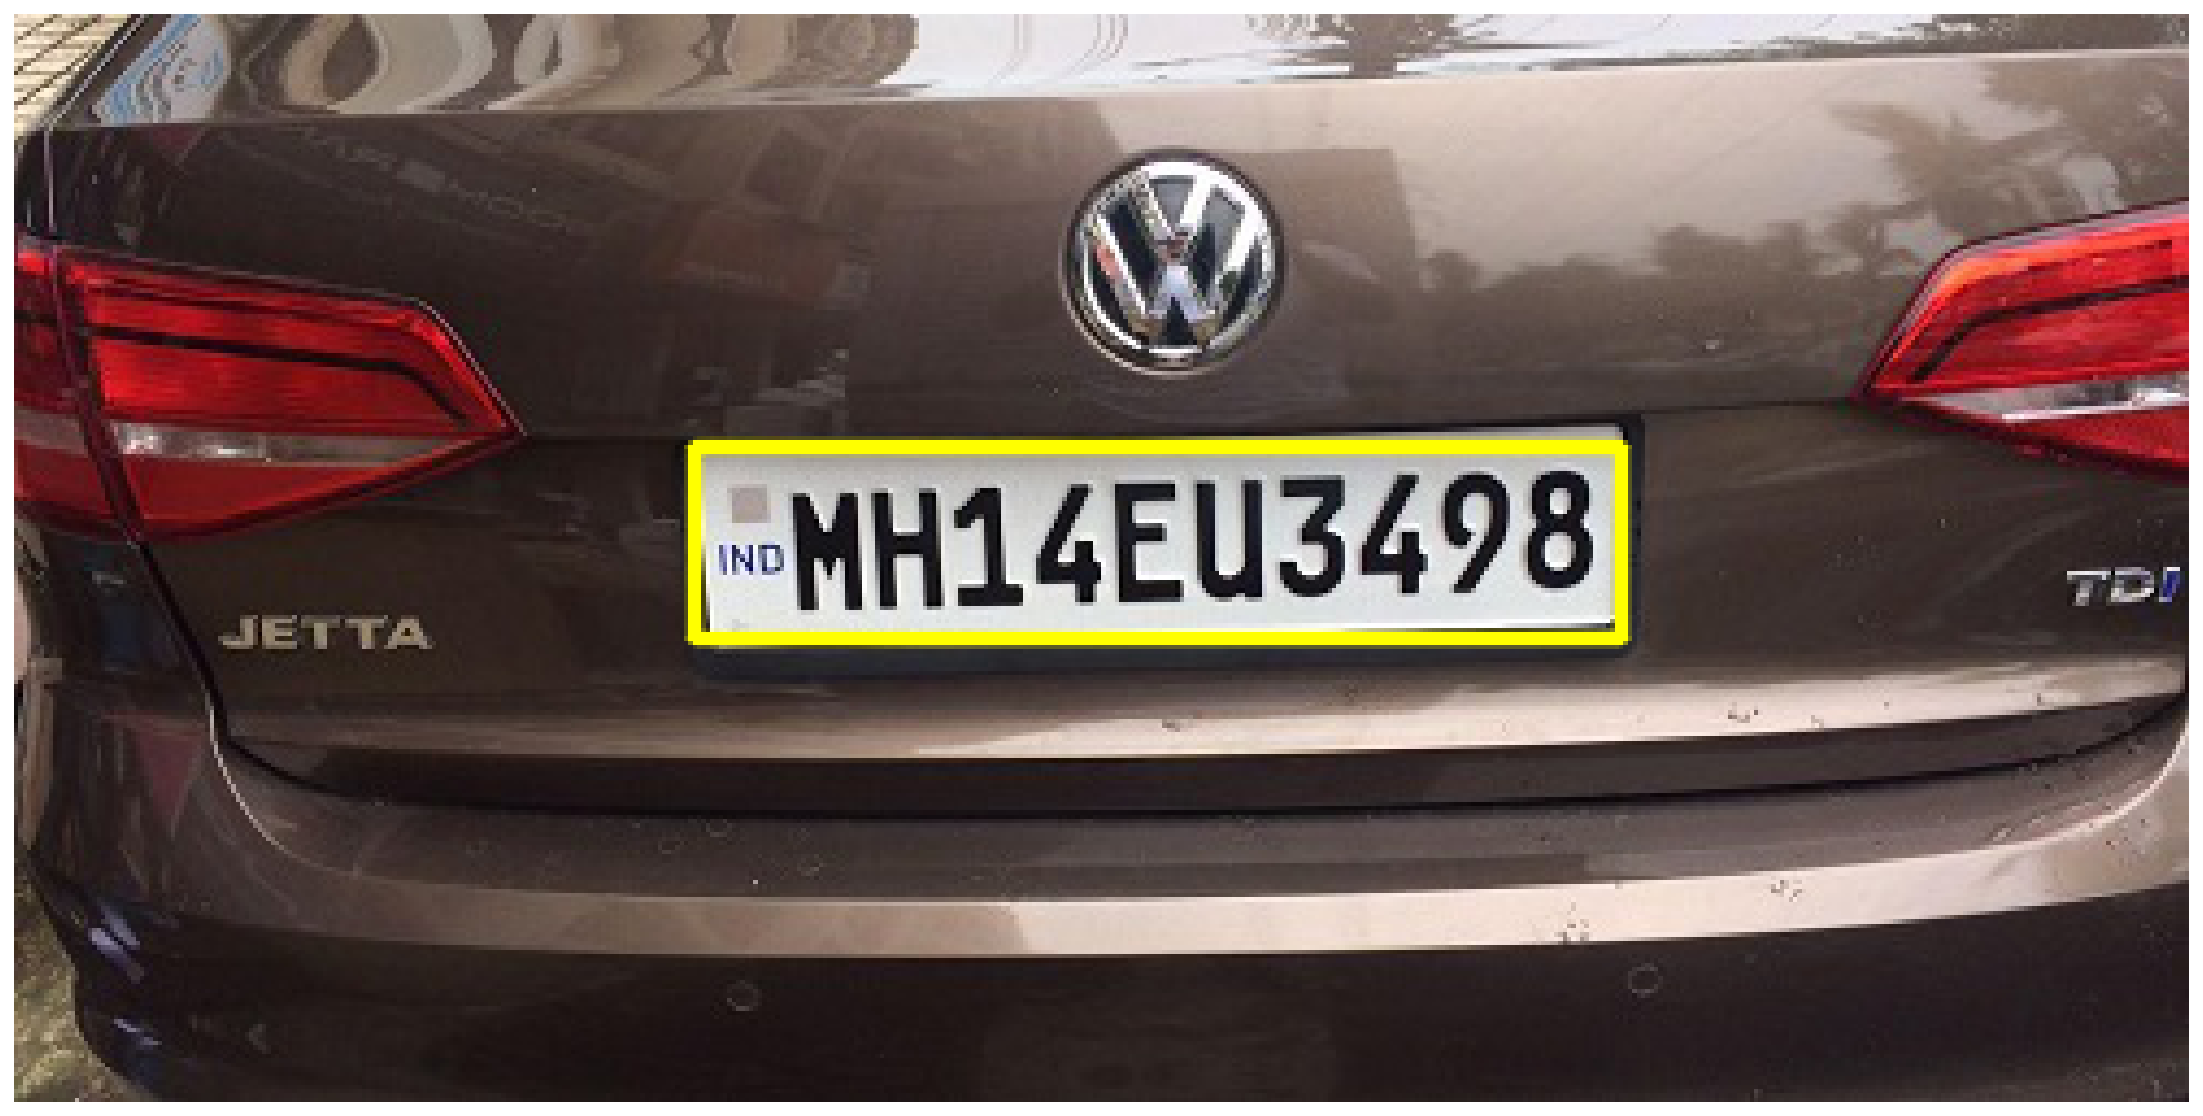

In [24]:
show_image_objects(df.iloc[0])

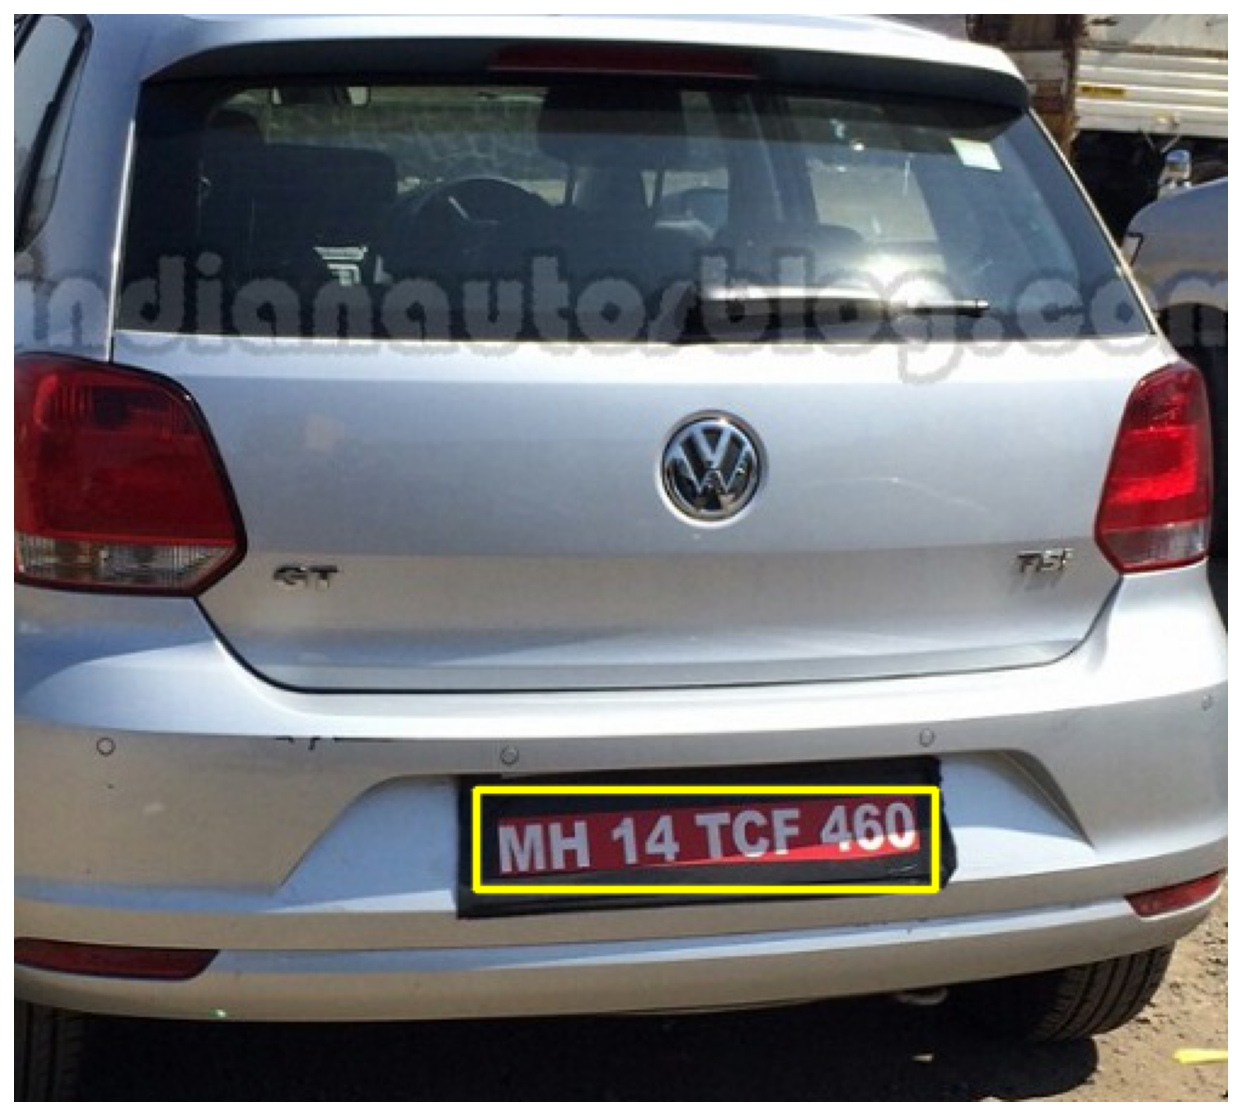

In [25]:
show_image_objects(df.iloc[5])

# Preprocessing

In [26]:
df

,newImage,xmin,ymin,xmax,ymax,label
0,vott-csv-export/1572920d1478091901-your-favour...,156,99,369,143,numberplate
1,vott-csv-export/1107433d1373284570-my-modded-s...,62,230,241,274,numberplate
2,vott-csv-export/1431956d1446017445-number-plat...,138,135,389,191,numberplate
3,vott-csv-export/1.jpg,140,75,434,151,numberplate
4,vott-csv-export/1031520d1356604430-skoda-rapid...,160,210,364,251,numberplate
5,vott-csv-export/2014-VW-Polo-facelift-spied-In...,190,319,379,360,numberplate
6,vott-csv-export/1658240d1500548920-close-look-...,164,131,331,170,numberplate
7,vott-csv-export/2.jpg,146,102,367,213,numberplate
8,vott-csv-export/2014-Volkswagen-Polo-Review.jp...,159,260,328,297,numberplate
9,vott-csv-export/2017-Skoda-Rapid-Diesel-DSG-Re...,244,114,373,147,numberplate


In [27]:
train_df, test_df = train_test_split(
  df, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [28]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [29]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [30]:
classes = set(['numberplate'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [31]:
!head classes.csv

numberplate,0


In [32]:
!head annotations.csv

vott-csv-export/Maruti-Suzuki-recalls-75419-Baleno-cars-1961-DZire-cars-only-AGS-variant-Motown-India-Bureau-2-810.jpg.jpeg,121,123,214,146,numberplate
vott-csv-export/9214a754343030395508e104d7948167_large.jpg.jpeg,108,351,279,384,numberplate
vott-csv-export/1572920d1478091901-your-favourite-number-plate-font-jetta-german-font.jpg.jpeg,156,99,369,143,numberplate
vott-csv-export/1031520d1356604430-skoda-rapid-joins-family-edit-sold-wp_000281.jpg.jpeg,160,210,364,251,numberplate
vott-csv-export/Mahindra-Scorpio-Taillamps-Night.JPG.jpeg,150,216,376,262,numberplate
vott-csv-export/2014-VW-Polo-facelift-spied-India-rear.jpg.jpeg,190,319,379,360,numberplate
vott-csv-export/205356-maruti-swift-torque-blue-vdi-ddis-glistening-rockstar-enters-home-img_7531.jpg.jpeg,146,141,345,190,numberplate
vott-csv-export/77cca4b6f3864b3928824a030ba101d2.jpg.jpeg,53,201,184,229,numberplate
vott-csv-export/Maruti-Suzuki-Swift-Dzire-1.jpg.jpeg,110,151,251,181,numberplate
vott-csv-export/1107433d1373284570-my-

# Training

In [33]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [34]:
!ls

annotations.csv  examples	  README.md	    snapshots
build		 images		  requirements.txt  tests
classes.csv	 keras_retinanet  setup.cfg	    vott-csv-export
CONTRIBUTORS.md  LICENSE	  setup.py


In [35]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 1 --steps 1 --epochs 5 csv annotations.csv classes.csv

2022-07-10 04:34:40.656612: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2022-07-10 04:34:41.925543: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-07-10 04:34:41.959185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 04:34:41.959760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-07-10 04:34:41.959797: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-07-10 04:34:41.961574: I t

# Loading the trained model

In [36]:
!ls snapshots

_pretrained_model.h5  resnet50_csv_03.h5  resnet50_csv_10.h5
resnet50_csv_01.h5    resnet50_csv_04.h5
resnet50_csv_02.h5    resnet50_csv_05.h5


In [37]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_10.h5


In [38]:
labels_to_names

{0: 'numberplate'}

# Predictions

In [39]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [40]:
THRES_SCORE = 0.8

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)


In [41]:
def show_detected_objects(image_row):
  img_path = image_row.newImage
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.xmin, image_row.ymin, image_row.xmax, image_row.ymax
  ]
  draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [42]:
test_df.head(n=10)

,newImage,xmin,ymin,xmax,ymax,label
27,vott-csv-export/_bd7f7862-d727-11e7-ad30-e18a5...,363,174,430,193,numberplate
15,vott-csv-export/IMG_8883.jpg.jpeg,45,54,176,81,numberplate
23,vott-csv-export/Skoda-Octavia-1.8-TSI-5.jpg.jpeg,181,216,297,240,numberplate
17,vott-csv-export/995920d1349421647-cappuccino-b...,148,225,335,266,numberplate
8,vott-csv-export/2014-Volkswagen-Polo-Review.jp...,159,260,328,297,numberplate
9,vott-csv-export/2017-Skoda-Rapid-Diesel-DSG-Re...,244,114,373,147,numberplate
29,vott-csv-export/VW-Polo-GT-TSI-badges-on-the-b...,31,37,329,98,numberplate


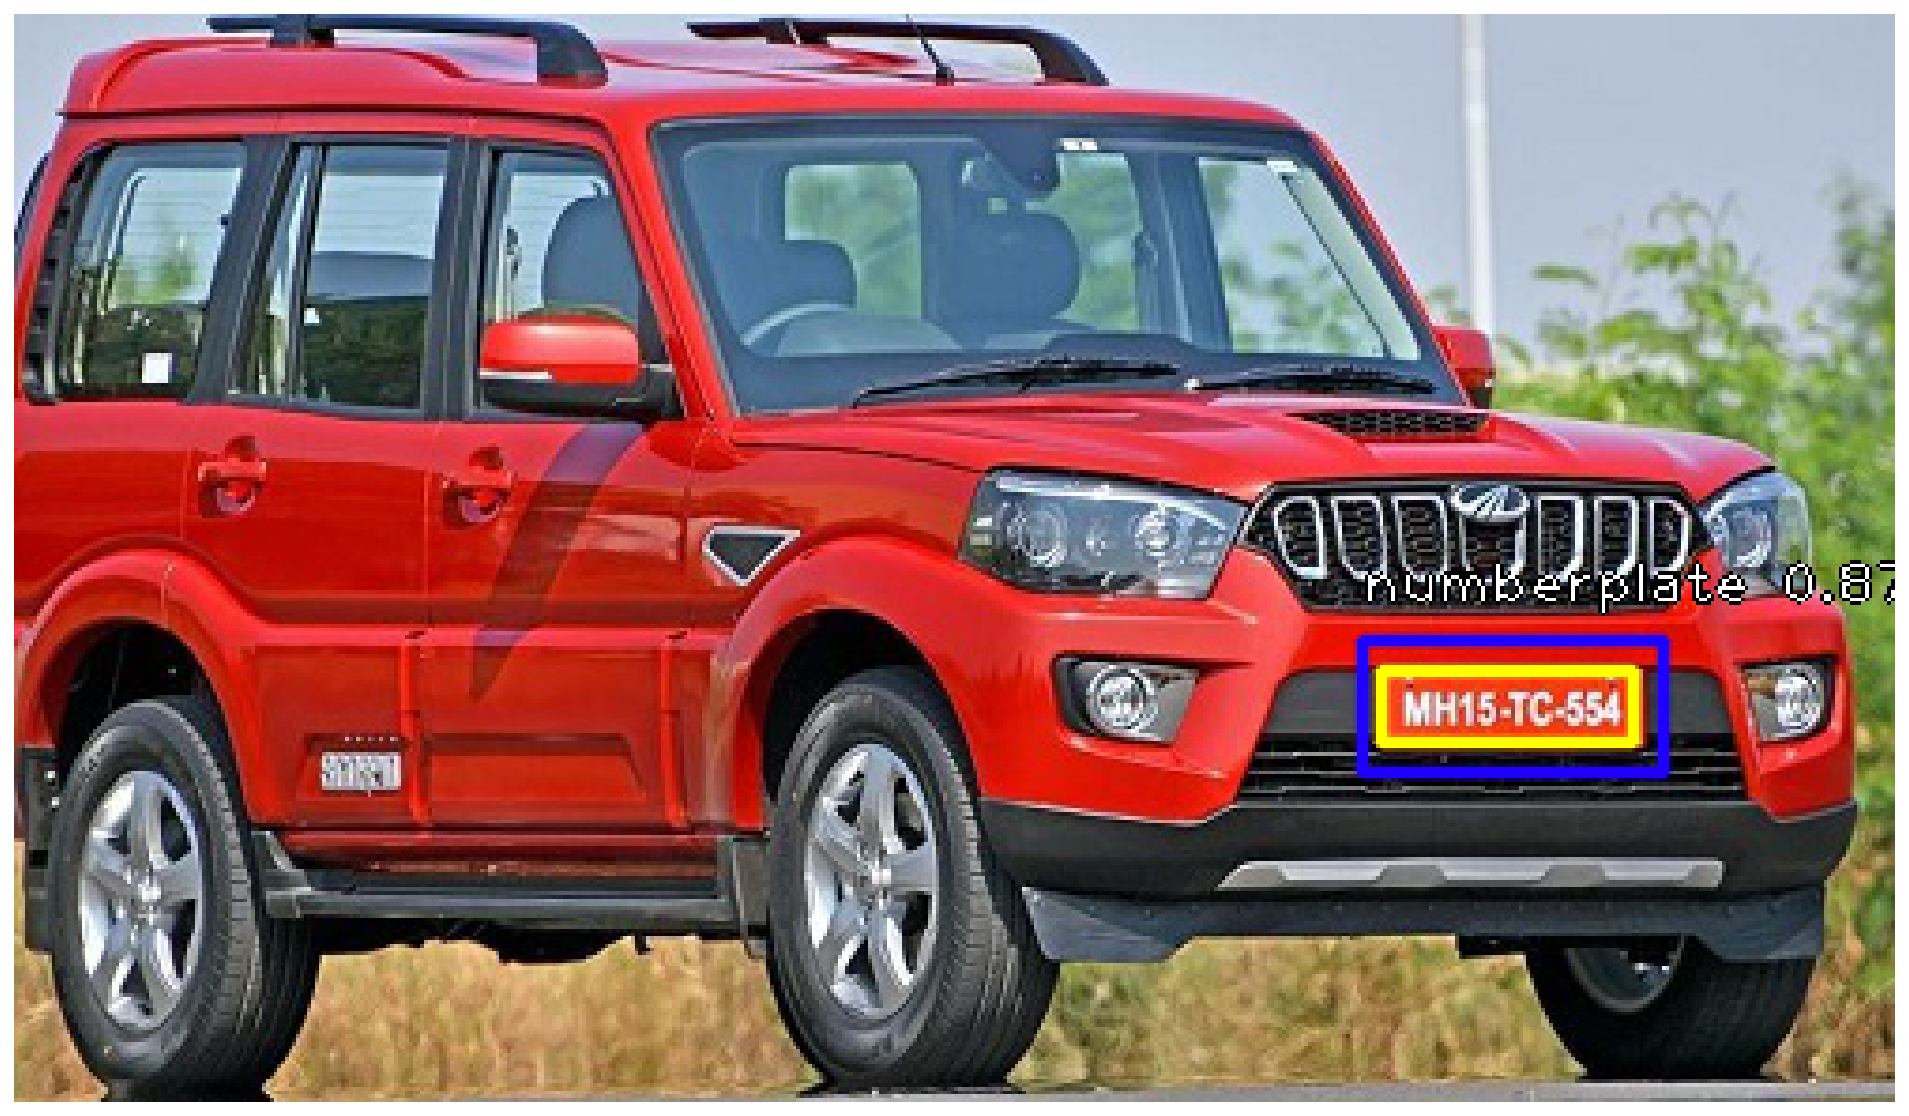

In [43]:
show_detected_objects(test_df.iloc[0])

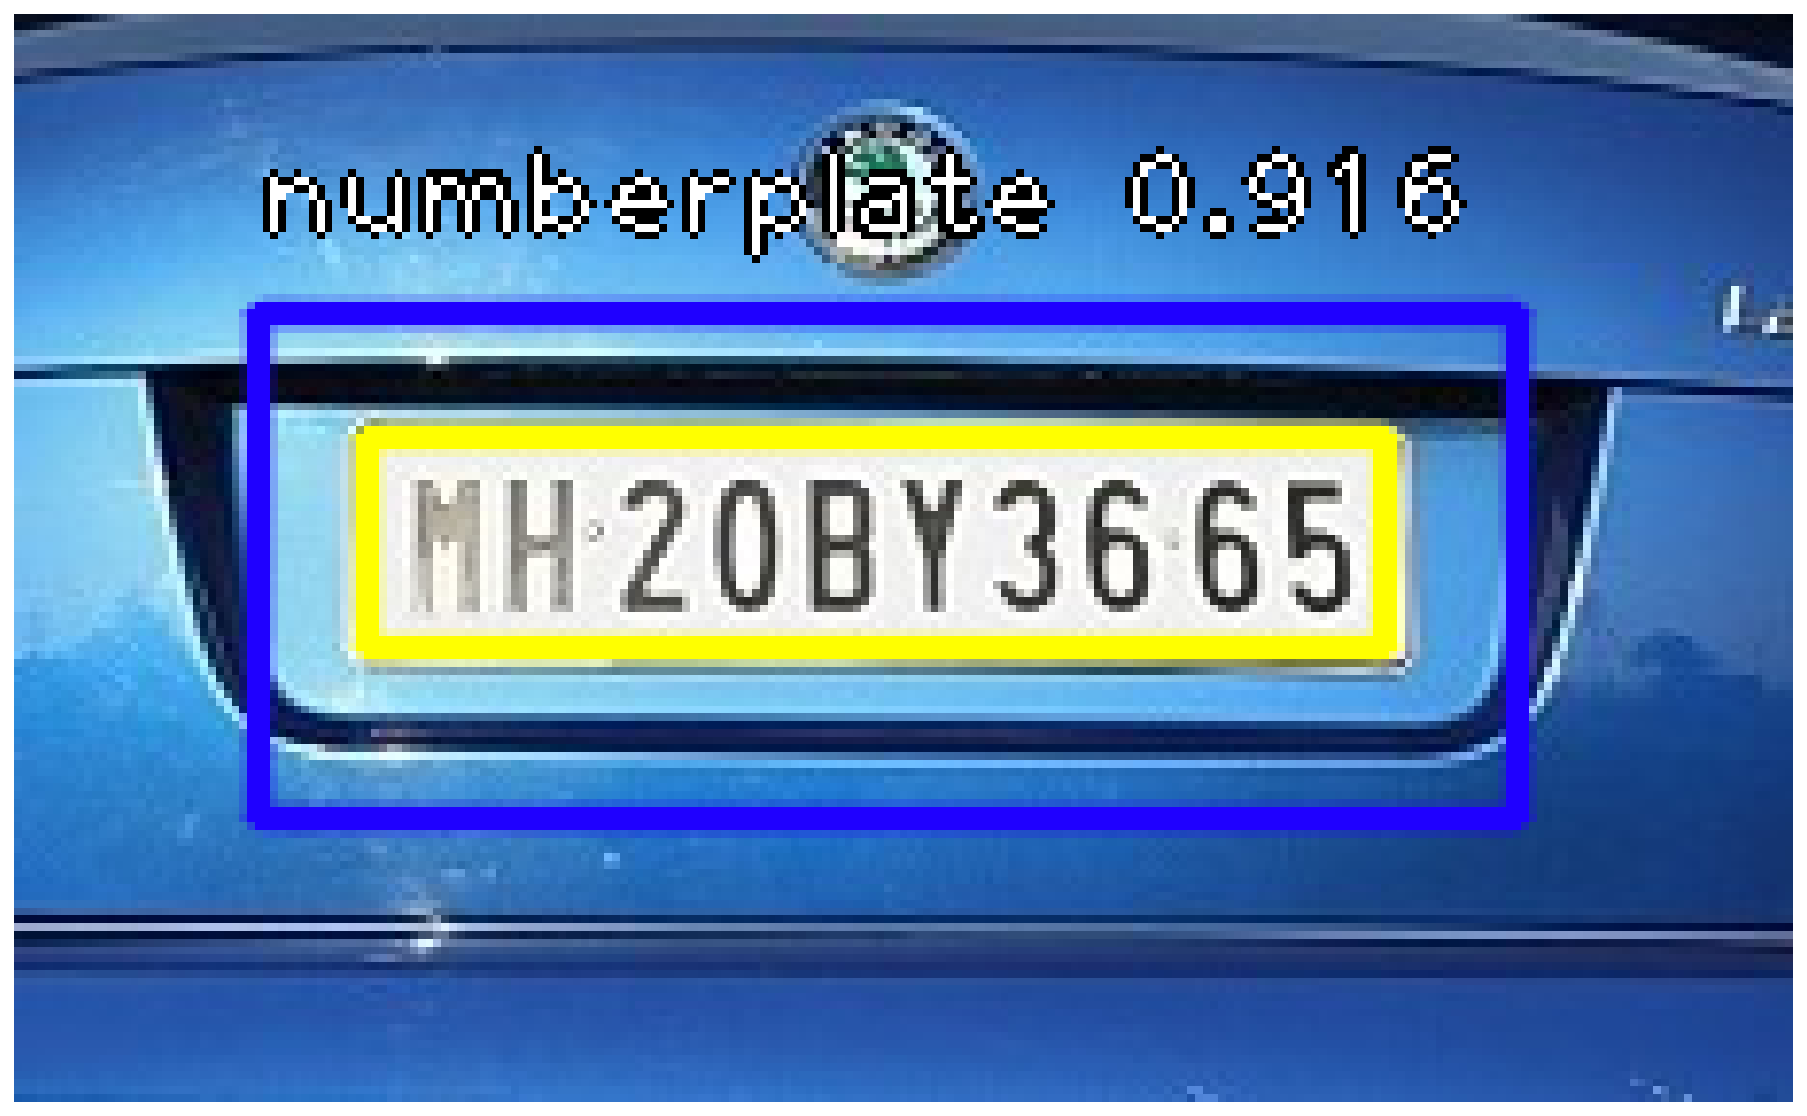

In [44]:
show_detected_objects(test_df.iloc[1])

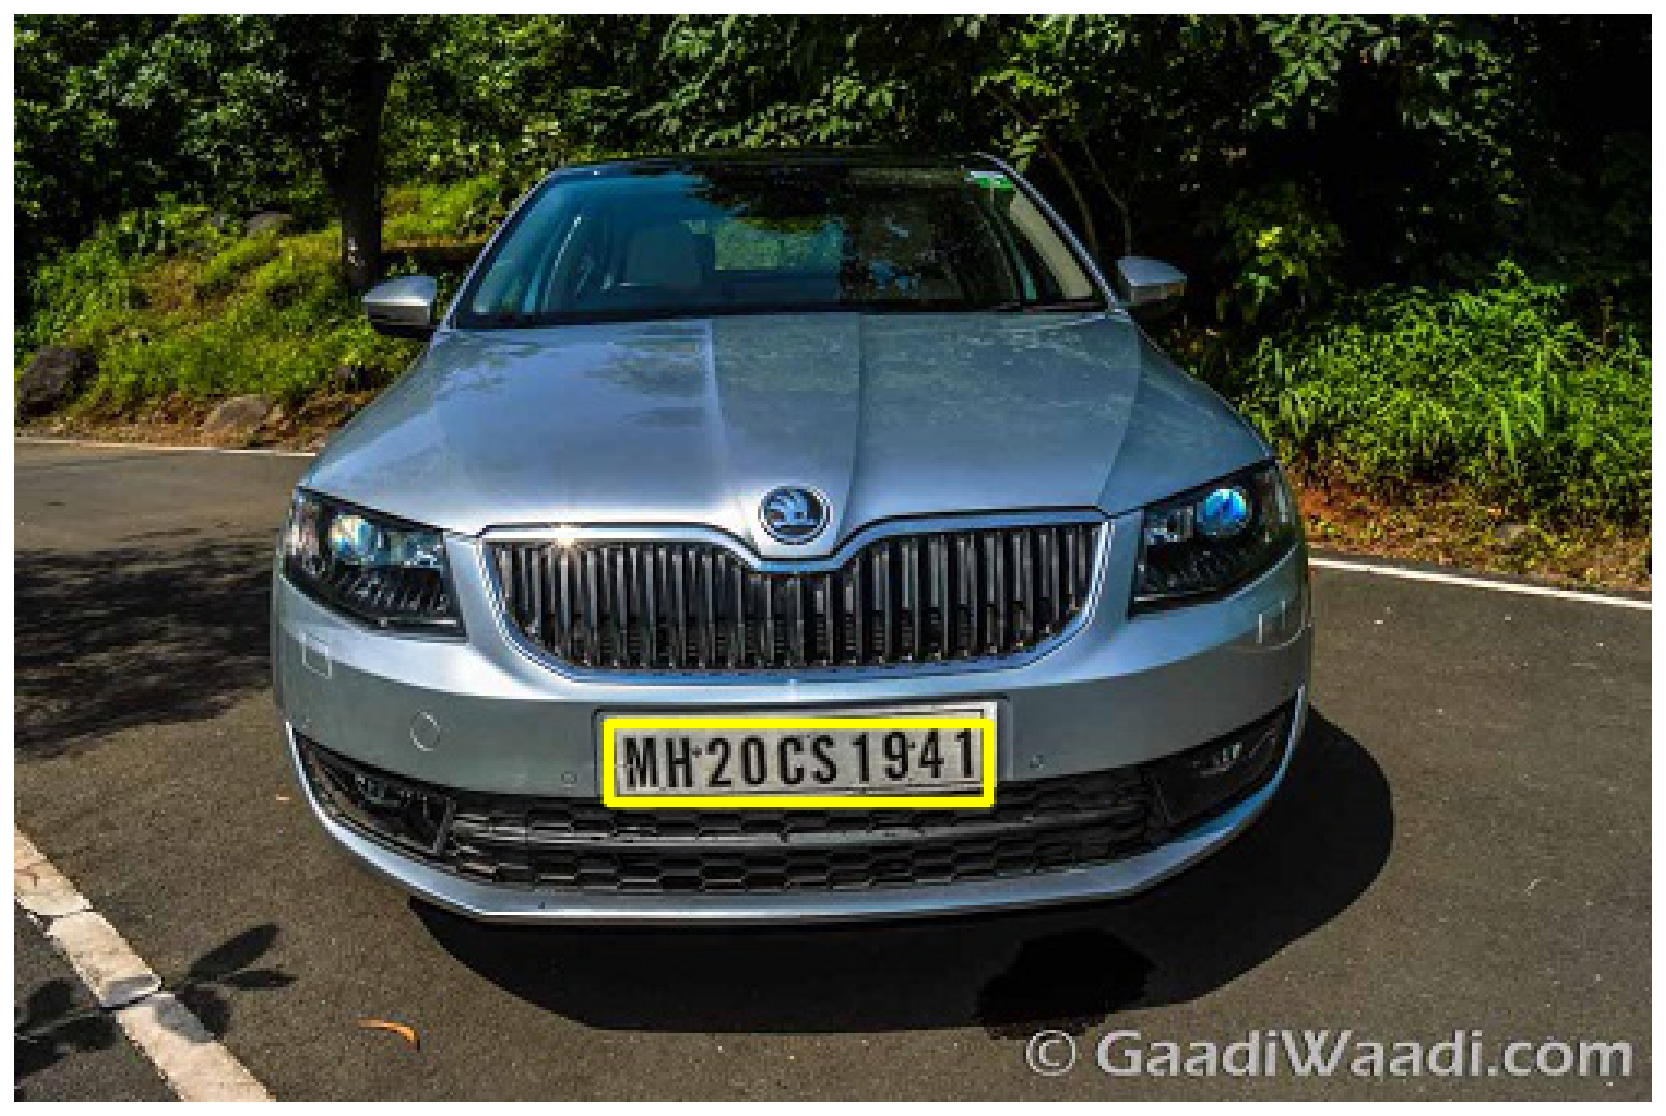

In [45]:
show_detected_objects(test_df.iloc[2])

In [46]:
test_df

,newImage,xmin,ymin,xmax,ymax,label
27,vott-csv-export/_bd7f7862-d727-11e7-ad30-e18a5...,363,174,430,193,numberplate
15,vott-csv-export/IMG_8883.jpg.jpeg,45,54,176,81,numberplate
23,vott-csv-export/Skoda-Octavia-1.8-TSI-5.jpg.jpeg,181,216,297,240,numberplate
17,vott-csv-export/995920d1349421647-cappuccino-b...,148,225,335,266,numberplate
8,vott-csv-export/2014-Volkswagen-Polo-Review.jp...,159,260,328,297,numberplate
9,vott-csv-export/2017-Skoda-Rapid-Diesel-DSG-Re...,244,114,373,147,numberplate
29,vott-csv-export/VW-Polo-GT-TSI-badges-on-the-b...,31,37,329,98,numberplate


In [47]:
np.__version__

'1.18.5'